In [5]:
!python run.py --encoder vitb --img-path /home/tamerlan/Masters/thesis/yolov5/tmp/frame_copy.png --outdir /home/tamerlan/Masters/thesis/Depth-Anything/ --pred-only --grayscale

xFormers not available
xFormers not available
Total parameters: 97.47M
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/it]


In [2]:
!python run.py --encoder vitb --img-path /home/tamerlan/Masters/thesis/datasets/kitti_depth/val_selection_cropped/image/ --outdir /home/tamerlan/Masters/thesis/Depth-Anything/tmp/ --pred-only --grayscale

xFormers not available
xFormers not available
Total parameters: 97.47M
100%|███████████████████████████████████████| 1000/1000 [52:38<00:00,  3.16s/it]


In [3]:
import torch

In [4]:
def eval_depth(pred, target):
    assert pred.shape == target.shape

    thresh = torch.max((target / pred), (pred / target))

    d1 = torch.sum(thresh < 1.25).float() / len(thresh)

    diff = pred - target
    diff_log = torch.log(pred) - torch.log(target)

    abs_rel = torch.mean(torch.abs(diff) / target)

    rmse = torch.sqrt(torch.mean(torch.pow(diff, 2)))
    mae = torch.mean(torch.abs(diff))

    silog = torch.sqrt(torch.pow(diff_log, 2).mean() - 0.5 * torch.pow(diff_log.mean(), 2))

    return {'d1': d1.detach(), 'abs_rel': abs_rel.detach(),'rmse': rmse.detach(), 'mae': mae.detach(), 'silog':silog.detach()}

In [3]:
gt_path = "/home/tamerlan/Masters/thesis/datasets/kitti_depth/val_selection_cropped/groundtruth_depth/2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png"
pred_path = "/home/tamerlan/Masters/thesis/Depth-Anything/tmp/2011_09_26_drive_0002_sync_image_0000000005_image_02_depth.png"

In [12]:
from metrics import compute_errors
import cv2
from matplotlib import pyplot as plt

In [8]:
pred_image = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

gt_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

compute_errors(pred_image, gt_image)

/home/tamerlan/Masters/thesis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/tamerlan/Masters/thesis/Depth-Anything/metrics.py:148: RuntimeWarning: invalid value encountered in scalar subtract
  return np.sqrt(np.sum(np.square(log_diff)) / num_pixels - np.square(np.sum(log_diff)) / np.square(num_pixels))


{'num_valid': 99247,
 'l1': 118.51333541568007,
 'l1_inverse': 0.0,
 'scale_invariant': nan,
 'abs_relative': 12.423553704854601,
 'sq_relative': 9.891275167680494,
 'avg_log10': inf,
 'rmse_log': inf,
 'rmse': 10.36148316168216,
 'ratio_threshold_1.25': 0.03582979838181507,
 'ratio_threshold_1.5625': 0.07257650105292855,
 'ratio_threshold_1.953125': 0.10938365895190787}

255


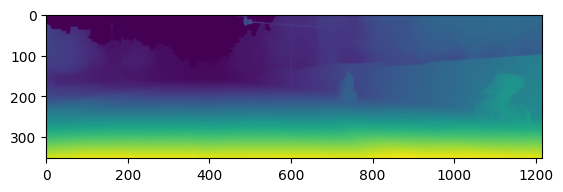

In [18]:
plt.imshow(pred_image)
print(pred_image.max())

<built-in method max of numpy.ndarray object at 0x7c49d0dc5050>


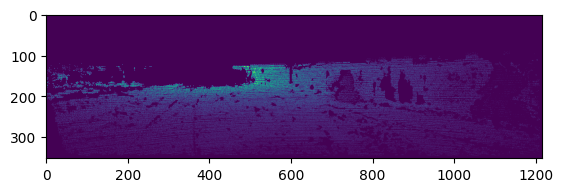

In [16]:
plt.imshow(gt_image)

In [17]:
print(gt_image.max())

80
